In [2]:
aliginingwithArousal = [
 "shhs1-200094_ds.npy"
,"shhs1-200245_ds.npy"
,"shhs1-200291_ds.npy"
,"shhs1-200312_ds.npy"
,"shhs1-200387_ds.npy"
,"shhs1-200860_ds.npy"
,"shhs1-200641_ds.npy"
,"shhs1-200668_ds.npy"
,"shhs1-200692_ds.npy"
,"shhs1-200759_ds.npy"
,"shhs1-201234_ds.npy"
,"shhs1-201277_ds.npy"
,"shhs1-201284_ds.npy"
,"shhs1-201343_ds.npy"
,"shhs1-201199_ds.npy"
,"shhs1-201565_ds.npy"
,"shhs1-201632_ds.npy"
,"shhs1-201852_ds.npy"
,"shhs1-201678_ds.npy"
,"shhs1-201716_ds.npy"
,"shhs1-201756_ds.npy"
,"shhs1-202055_ds.npy"
,"shhs1-202310_ds.npy"
,"shhs1-202393_ds.npy"
,"shhs1-202152_ds.npy"
,"shhs1-202438_ds.npy"
,"shhs1-202559_ds.npy"
,"shhs1-202405_ds.npy"
,"shhs1-202503_ds.npy"
,"shhs1-202712_ds.npy"
,"shhs1-202558_ds.npy"
,"shhs1-202622_ds.npy"
,"shhs1-202763_ds.npy"
,"shhs1-202717_ds.npy"
,"shhs1-202849_ds.npy"
,"shhs1-202916_ds.npy"
,"shhs1-202986_ds.npy"
,"shhs1-203001_ds.npy"
,"shhs1-203089_ds.npy"
,"shhs1-203115_ds.npy"
,"shhs1-203139_ds.npy"
,"shhs1-203196_ds.npy"
,"shhs1-203307_ds.npy"
,"shhs1-203355_ds.npy"
,"shhs1-203521_ds.npy"
,"shhs1-203418_ds.npy"
,"shhs1-203571_ds.npy"
,"shhs1-203432_ds.npy"
,"shhs1-203645_ds.npy"
,"shhs1-203677_ds.npy"
,"shhs1-203567_ds.npy"
,"shhs1-203684_ds.npy"
,"shhs1-203589_ds.npy"
,"shhs1-203592_ds.npy"
,"shhs1-203763_ds.npy"
,"shhs1-203705_ds.npy"
,"shhs1-203766_ds.npy"
,"shhs1-203846_ds.npy"
,"shhs1-203864_ds.npy"
,"shhs1-203827_ds.npy"
,"shhs1-204014_ds.npy"
,"shhs1-204039_ds.npy"
,"shhs1-204065_ds.npy"
,"shhs1-204097_ds.npy"
,"shhs1-204079_ds.npy"
,"shhs1-204089_ds.npy"
,"shhs1-204144_ds.npy"
,"shhs1-204236_ds.npy"
,"shhs1-204269_ds.npy"
,"shhs1-204268_ds.npy"
                      ]

# lookingSection = "Respiratory"
lookingSection = "Arousal"
lookingSection


import os
# import pyedflib
import argparse
import statistics
import numpy as np
import scipy.signal 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time
import scipy.interpolate

import pandas as pd
col_list = ["a"]

t1 = time.time()


df = pd.read_csv("C:/Users/Bpradsad/Desktop/data/SaO2/norm_sparkremoverAVG_full50_STFT_n/htnderv_s2_n.csv", usecols=["a","b"])
## shhs1-200001
file_n = []
for i in df["a"]:
    file_n.append(f"{i}")

df = pd.read_csv("C:/Users/Bpradsad/Desktop/data/SaO2/norm_sparkremoverAVG_full50_STFT_n/htnderv_s2_n.csv", usecols=["a","b"])
## shhs1-200001
label_n = []
for i in df["b"]:
#     print(df["b"])
    label_n.append(f"{i}")

import os.path
file_nn = []
label_nn = []

for i, patient in enumerate(file_n):
    file_exist = os.path.exists('D:/Directory_D_Desk_jup/Raw_npy/Signal_SaO2_OX_'+lookingSection+"/"+patient)
    if file_exist == True and patient not in aliginingwithArousal:
        file_nn.append(patient)
        label_nn.append(int(label_n[i]))
        
    if file_exist == False:
#         print(patient)
        pass
#         print(patient)




D_len = {}
tempp = []
for counter, patient in enumerate(file_nn, 0):
    p = []
    temp = np.load('D:/Directory_D_Desk_jup/Raw_npy/Signal_SaO2_OX_'+lookingSection+"/"+patient)
    D_len[patient[:-7]] = len(temp)//30
    tempp.append(len(temp)//30)
np.cumsum(tempp)



import math

df = pd.read_csv("C:/Features/time_6_"+lookingSection+"_segmented/htnderv_s2_nnn.csv", usecols=["a","b"])
df = df.dropna(axis=0)
# ## shhs1-200001
file_n = []
label_n = []
indexconsider = []
cnt = 0
for i,j in zip(df["a"],df["b"]):
    if i[:12]+"_ds.npy" not in aliginingwithArousal:
        file_n.append(f"{i}")
        label_n.append(int(j))
        indexconsider.append(cnt)
    cnt += 1
#     file_n.append(f"{i}")
#     label_n.append(int(j))
#     indexconsider.append(cnt)



D_len = {}
tempp = []
for counter, patient in enumerate(file_nn, 0):
    p = []
    temp = np.load("D:/Directory_D_Desk_jup/Raw_npy/Signal_SaO2_OX_"+lookingSection+"/"+patient)
    D_len[patient[:-7]] = len(temp)//30
    tempp.append(len(temp)//30)

CUMSUM = np.cumsum(tempp)

t1 = time.time()


# ######################################################

X_train, y_train, X_test, y_test = [], [], [], []


t1 = time.time()

        

X = np.load("C:/Features/mfcc.npy").reshape(240731,-1)
X = X[indexconsider]
X[np.isnan(X)] = 0





print(X.shape)

X_train = X[:CUMSUM[1400], :]
X_test = X[CUMSUM[1400]:, :]

for i, patient in enumerate(file_n):
#     temp = np.load("C:/Features/45_1_7_feature_"+lookingSection+"/"+patient).flatten()
    if i < CUMSUM[1400]:
#         X_train.append(list(temp))
        y_train.append(label_n[i])
    else:
#         X_test.append(list(temp))
        y_test.append(label_n[i])

#     print((time.time() - t1)/60)


X_tr  = X_train   
X_te = X_test 
y_tr = y_train 
y_te = y_test
# print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)
print(time.time() - t1)

CUMSUM_train = CUMSUM[:1400]
CUMSUM_new = CUMSUM - CUMSUM[1400]
CUMSUM_new = CUMSUM_new[1400:]


(240731, 184)
0.341184139251709


acc 0.49475233169591654
predict_res [0 0 0 ... 0 0 0]
7049.550278425217
>>> 0.514792899408284 0


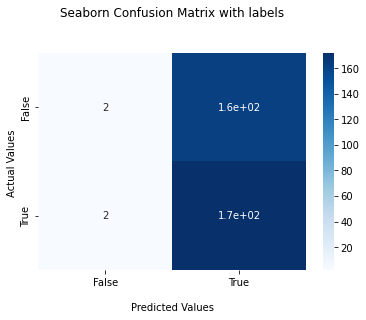

Accuracy 0.5003504345388281


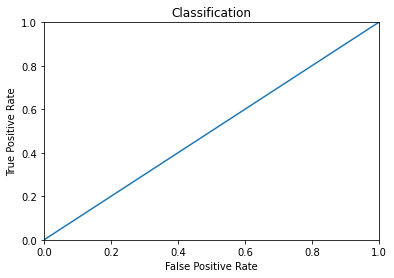

Acc_test 0.514792899408284 ther 1
>>> 0.5207100591715976 0.514792899408284


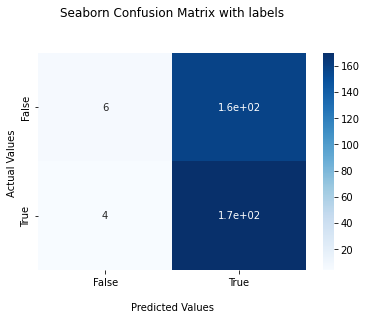

Accuracy 0.5067984300532661


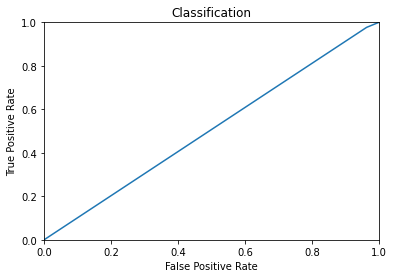

Acc_test 0.5207100591715976 ther 2
>>> 0.5207100591715976 0.5207100591715976


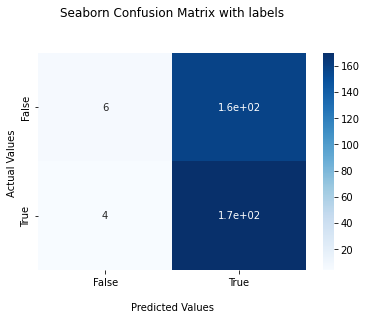

Accuracy 0.5067984300532661


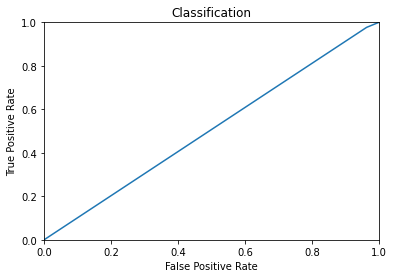

Acc_test 0.5207100591715976 ther 3
>>> 0.5177514792899408 0.5207100591715976
>>> 0.5207100591715976 0.5207100591715976


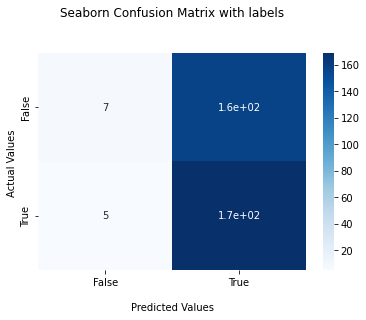

Accuracy 0.5069736473226801


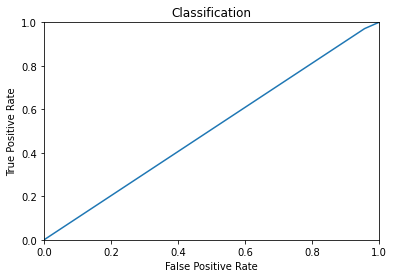

Acc_test 0.5207100591715976 ther 5
>>> 0.5177514792899408 0.5207100591715976
>>> 0.5177514792899408 0.5207100591715976
>>> 0.5177514792899408 0.5207100591715976
>>> 0.5207100591715976 0.5207100591715976


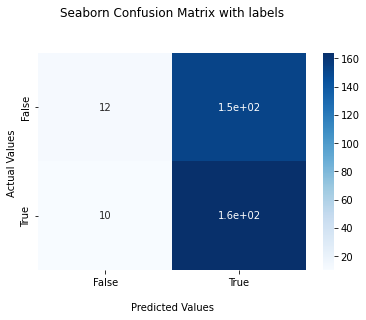

Accuracy 0.5078497336697505


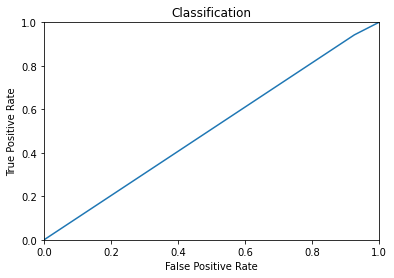

Acc_test 0.5207100591715976 ther 9
>>> 0.5266272189349113 0.5207100591715976


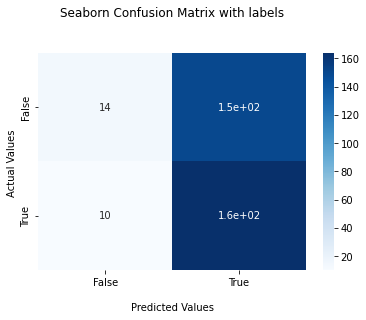

Accuracy 0.5139472946453602


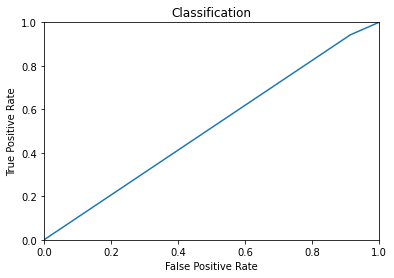

Acc_test 0.5266272189349113 ther 10
>>> 0.514792899408284 0.5266272189349113
>>> 0.514792899408284 0.5266272189349113
>>> 0.5295857988165681 0.5266272189349113


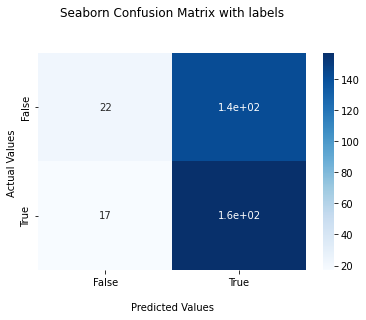

Accuracy 0.5182225960190636


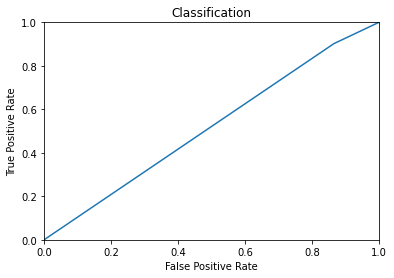

Acc_test 0.5295857988165681 ther 13
>>> 0.5295857988165681 0.5295857988165681


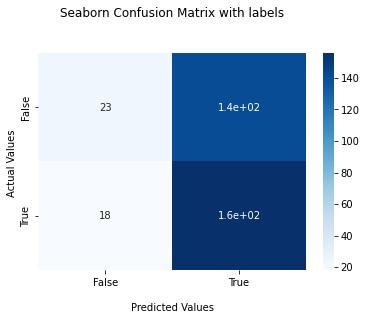

Accuracy 0.5183978132884777


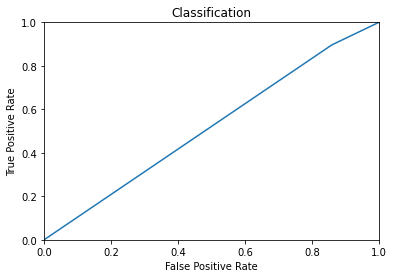

Acc_test 0.5295857988165681 ther 14
>>> 0.5355029585798816 0.5295857988165681


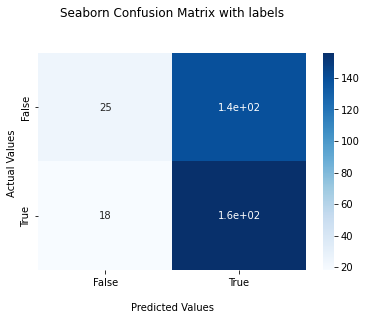

Accuracy 0.5244953742640874


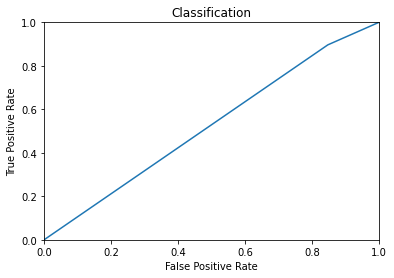

Acc_test 0.5355029585798816 ther 15
>>> 0.5355029585798816 0.5355029585798816


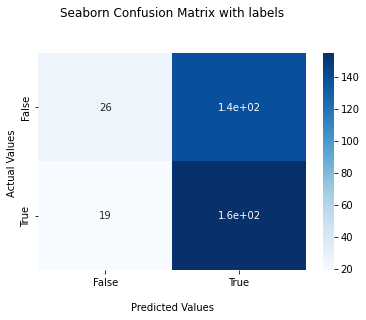

Accuracy 0.5246705915335015


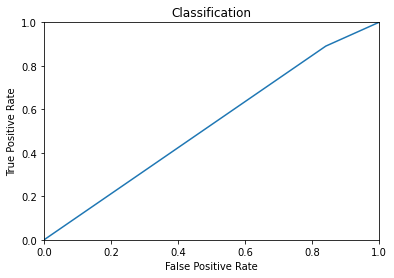

Acc_test 0.5355029585798816 ther 16
>>> 0.5384615384615384 0.5355029585798816


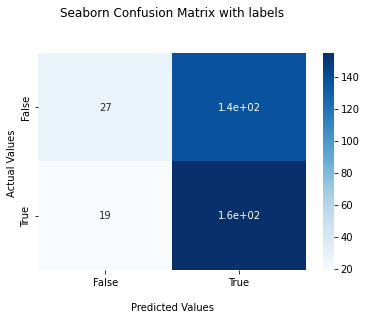

Accuracy 0.5277193720213064


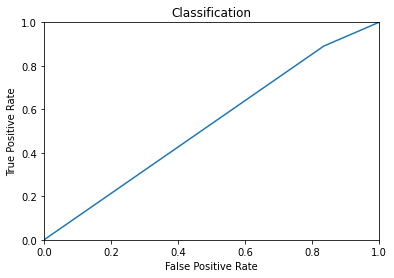

Acc_test 0.5384615384615384 ther 17
>>> 0.5414201183431953 0.5384615384615384


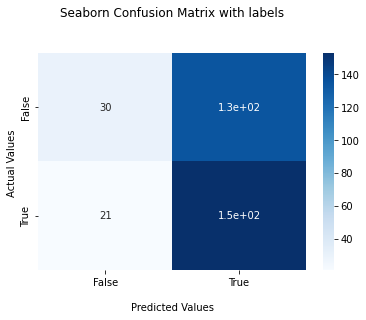

Accuracy 0.5311185870479395


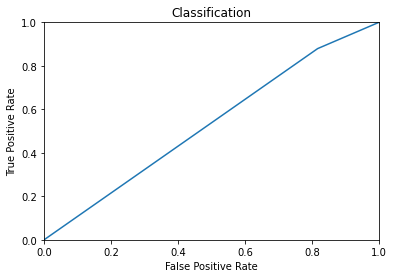

Acc_test 0.5414201183431953 ther 18
>>> 0.5443786982248521 0.5414201183431953


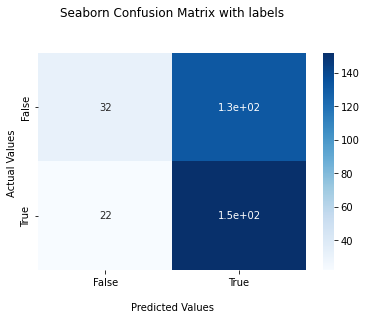

Accuracy 0.5343425848051584


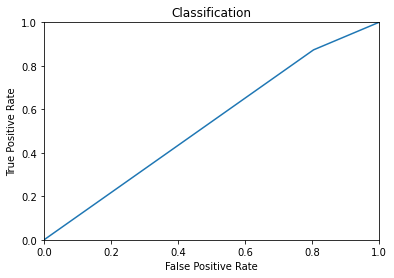

Acc_test 0.5443786982248521 ther 19
>>> 0.5414201183431953 0.5443786982248521
>>> 0.5384615384615384 0.5443786982248521
>>> 0.5443786982248521 0.5443786982248521


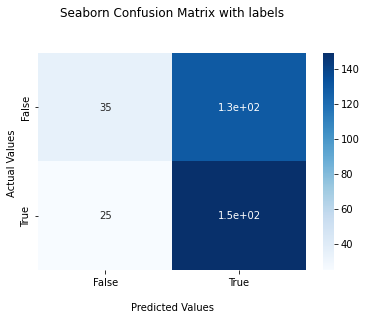

Accuracy 0.5348682366134005


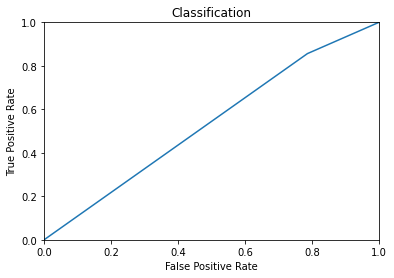

Acc_test 0.5443786982248521 ther 22
>>> 0.5443786982248521 0.5443786982248521


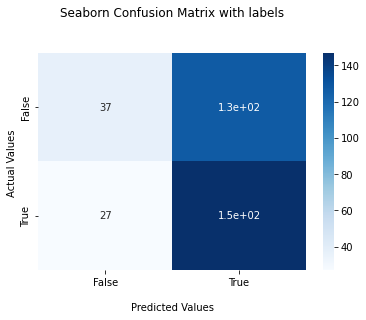

Accuracy 0.5352186711522288


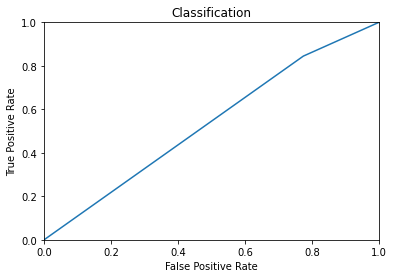

Acc_test 0.5443786982248521 ther 23
>>> 0.5414201183431953 0.5443786982248521
>>> 0.5414201183431953 0.5443786982248521
>>> 0.5414201183431953 0.5443786982248521
>>> 0.5384615384615384 0.5443786982248521
>>> 0.5414201183431953 0.5443786982248521
>>> 0.5443786982248521 0.5443786982248521


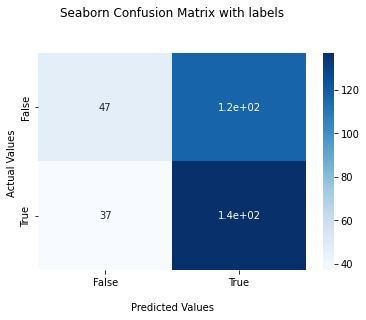

Accuracy 0.5369708438463695


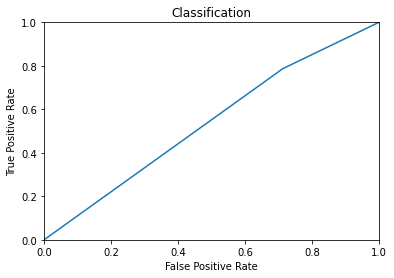

Acc_test 0.5443786982248521 ther 29
>>> 0.5414201183431953 0.5443786982248521
>>> 0.5443786982248521 0.5443786982248521


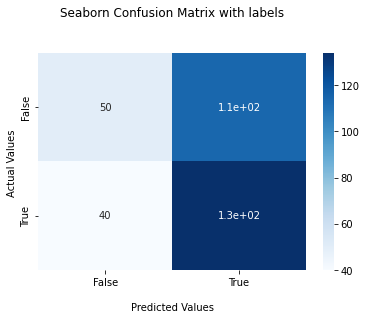

Accuracy 0.5374964956546118


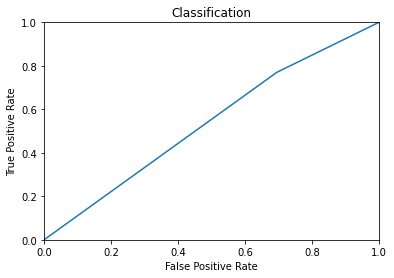

Acc_test 0.5443786982248521 ther 31
>>> 0.5384615384615384 0.5443786982248521
>>> 0.5325443786982249 0.5443786982248521
>>> 0.5384615384615384 0.5443786982248521
>>> 0.5443786982248521 0.5443786982248521


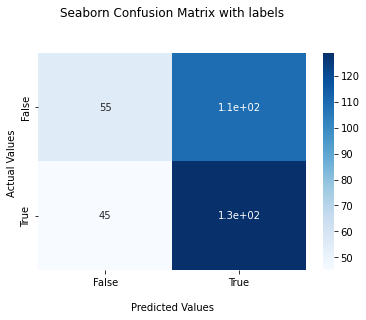

Accuracy 0.538372582001682


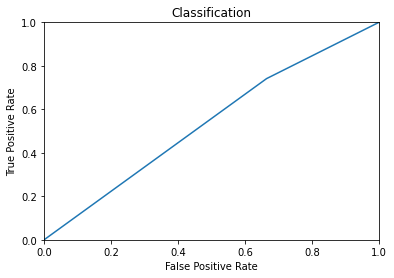

Acc_test 0.5443786982248521 ther 35
>>> 0.5473372781065089 0.5443786982248521


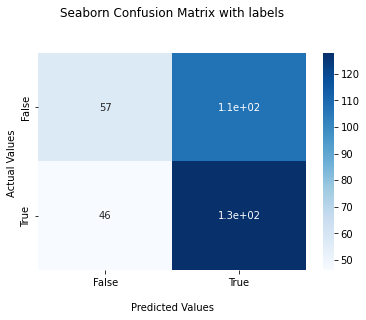

Accuracy 0.5415965797589011


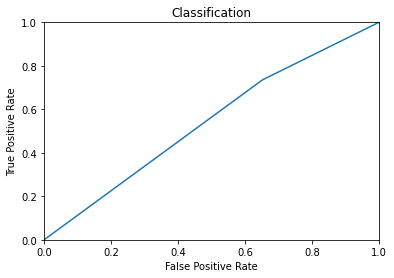

Acc_test 0.5473372781065089 ther 36
>>> 0.5443786982248521 0.5473372781065089
>>> 0.5414201183431953 0.5473372781065089
>>> 0.5473372781065089 0.5473372781065089


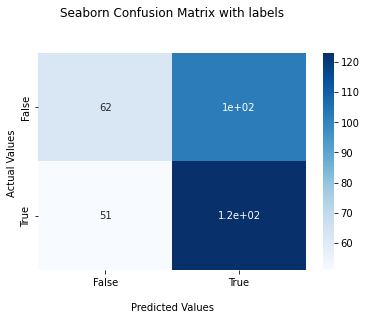

Accuracy 0.5424726661059714


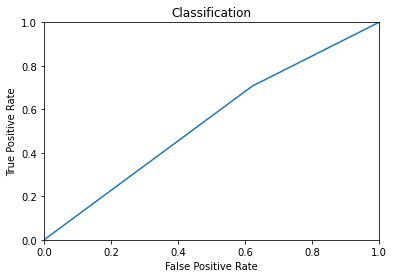

Acc_test 0.5473372781065089 ther 39
>>> 0.5443786982248521 0.5473372781065089
>>> 0.5355029585798816 0.5473372781065089
>>> 0.5325443786982249 0.5473372781065089
>>> 0.5266272189349113 0.5473372781065089
>>> 0.5207100591715976 0.5473372781065089
>>> 0.5266272189349113 0.5473372781065089
>>> 0.5266272189349113 0.5473372781065089
>>> 0.5177514792899408 0.5473372781065089
>>> 0.5236686390532544 0.5473372781065089
>>> 0.5266272189349113 0.5473372781065089
>>> 0.5207100591715976 0.5473372781065089
>>> 0.5207100591715976 0.5473372781065089
>>> 0.514792899408284 0.5473372781065089
>>> 0.5088757396449705 0.5473372781065089
>>> 0.4940828402366864 0.5473372781065089
>>> 0.4940828402366864 0.5473372781065089
>>> 0.4911242603550296 0.5473372781065089
>>> 0.4940828402366864 0.5473372781065089
>>> 0.4881656804733728 0.5473372781065089
>>> 0.4940828402366864 0.5473372781065089
>>> 0.4970414201183432 0.5473372781065089
>>> 0.4970414201183432 0.5473372781065089
>>> 0.4940828402366864 0.5473372781065089

>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
>>> 0.48520710059171596 0.5473372781065089
time 7054.261474370956


In [3]:
##########################################################
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM.fit(X_tr, y_tr)


# Predict on dataset which model has not seen before
print("acc", sum(SVM.predict(X_te) == y_te)/len(y_te))


# predict_res_train = SVM.predict(X_tr)
# print("predict_res_train", predict_res_train)
predict_res = SVM.predict(X_te)
print("predict_res", predict_res)

# predict_proba = SVM.predict_proba(X_te)
#     print((time.time() - t1)/60)

CUMSUM_train = CUMSUM[:1400]
CUMSUM_new = CUMSUM - CUMSUM[1400]
CUMSUM_new = CUMSUM_new[1400:]


# CUMSUM_new

darsadofONE = sum(y_test)/len(y_test)
print(time.time() - t1)



##################################################################################
def Confusion_pic(actual,y_pred_test, Thereshold, Acc, darsadofONE):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc,roc_auc_score

    # cf1 = confusion_matrix(y_train, y_pred_train)
    
    cf1 = confusion_matrix(actual, y_pred_test)
    import seaborn as sns

    ax = sns.heatmap(cf1, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    #cf2
#     ax = sns.heatmap(cf2, annot=True, cmap='Blues')

#     ax.set_title('Confusion Matrix \n'+"#"+f"{Thereshold}"+"_"+"Acc:"+f"{round(Acc, 2)}"+"percent_1"+"__"+f"{round(darsadofONE, 2)}");
#     ax.set_xlabel('\nPredicted Values')
#     ax.set_ylabel('Actual Values');

#     ## Ticket labels - List must be in alphabetical order
#     ax.xaxis.set_ticklabels(['False','True'])
#     ax.yaxis.set_ticklabels(['False','True'])

#     ## Display the visualization of the Confusion Matrix.
#     plt.savefig("C:/Features/figsonlyfeatures59_/"+lookingSection+"_confusion/"+"#"+f"{Thereshold}"+"__"+"Acc"+f"{round(Acc, 2)}"+"percent_1"+"__"+f"{round(darsadofONE, 2)}"+".png")
#     plt.show()


    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(actual, y_pred_test)
        roc_auc[i] = auc(fpr[i], tpr[i])

    print("Accuracy", roc_auc_score(actual, y_pred_test))
    plt.figure()
    plt.plot(fpr[1], tpr[1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Classification')
    plt.savefig("C:/Features/figs_/"+"#"+f"{Thereshold}"+"auc"+".png")
    plt.show()
###########################################################################################################################################################################


    



#     if Acc_test >= best_acc:
#         best_acc = Acc_test
#         Confusion_pic(actual, y_pred_test, Thereshold, Acc, darsadofONE)

best_acc = 0
darsadofONE = sum(y_test)/len(y_test)


for ther in np.arange(1,300):
    Thereshold = ther
    y_pred_test = []
    y_pred_train = []
    actual_test = []
    actual_train = []
        
    NN=200
    
    for i in range(1, len(CUMSUM_new)-2):
 
        if sum(predict_res[CUMSUM_new[i]:CUMSUM_new[i+1]]) >= ther:
            predicted_label = 1
        else:
            predicted_label = 0

        actual_label = int(sum(y_test[CUMSUM_new[i]:CUMSUM_new[i+1]]) /len(y_test[CUMSUM_new[i]:CUMSUM_new[i+1]]))

        y_pred_test.append(predicted_label)
        actual_test.append(actual_label)

        
#     for i in range(len(CUMSUM[:1400])-2):
#         if sum(predict_res_train[CUMSUM[i]:CUMSUM[i+1]]) >= Thereshold:
#             predicted_label = 1
#         else:
#             predicted_label = 0

#         actual_label = int(sum(y_train[CUMSUM[i]:CUMSUM[i+1]]) /len(y_train[CUMSUM[i]:CUMSUM[i+1]]))

#         y_pred_train.append(predicted_label)
#         actual_train.append(actual_label) 
        
        

#         Confusion_pic(actual,y_pred_test, Thereshold, Acc, darsadofONE)
        

    Acc_test = sum(np.array(y_pred_test) == np.array(actual_test)) / len(actual_test)
#     Acc_train = sum(np.array(y_pred_train) == np.array(actual_train)) / len(actual_train)

    print(">>>", Acc_test, best_acc)
    if Acc_test >= best_acc:
        best_acc = Acc_test
        Confusion_pic(actual_test, y_pred_test, Thereshold, Acc_test, darsadofONE)
        print("Acc_test", Acc_test, "ther", ther)
        ttt = ther
        y_final_best = y_pred_test

print("time", time.time() - t1)

import numpy as np
np.save("C:/Features/SVM_SUBFEATURE_RES/mfcc"+f"{ttt}", y_final_best)

In [28]:
from sklearn.preprocessing import StandardScaler

X_train, y_train, X_test, y_test = [], [], [], []
X = np.load("C:/Features/pitch_arousal_hann_amp.npy")
scaler = StandardScaler()
X = scaler.fit_transform(X)


X[np.isnan(X)] = 0
print(X.shape)
X_train = X[:CUMSUM[1400], :]
X_test = X[CUMSUM[1400]:, :]

for i, patient in enumerate(file_n):
    if i < CUMSUM[1400]:
        y_train.append(label_n[i])
    else:
        y_test.append(label_n[i])


X_tr  = X_train   
X_te = X_test 
y_tr = y_train 
y_te = y_test

(240731, 6)


In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

t1 = time.time()

C_range = np.array([.1,1,10,100,1000])
gamma_range = np.array([.0001,.001,.01,.1,1,10])
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), n_jobs = 10, param_grid = param_grid, cv=cv)
grid.fit(X_test, y_test)

print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))
print("===============================")
print("minute:", (time.time() - t1)/60)

The best parameters are {'C': 1.0, 'gamma': 1.0} with a score of 0.58
minute: 310.5646933078766


In [34]:
clf = SVC(kernel='rbf', C=grid.best_params_["C"], gamma=grid.best_params_["gamma"])
clf.fit(X_train, y_train)

In [32]:
grid.best_params_["gamma"]

1.0

In [35]:
np.random.choice(X_tr, size=3, replace=False, seed=42)

TypeError: choice() got an unexpected keyword argument 'seed'

In [81]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [82]:
y

range(0, 5)

In [85]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])